In [46]:
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st


#Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2001-06-15')
#Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2001-06-15')
#Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2001-06-15')




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138466,16821100
2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745598,11368300
2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098526,7732300
2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524681,8787200
2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450249,12259100


In [48]:
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,402.799988,405.130005,400.279999,400.589996,400.589996,74202000
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800
2023-02-01 00:00:00-05:00,405.209991,413.670013,402.350006,410.799988,410.799988,101459200
2023-02-02 00:00:00-05:00,414.859985,418.309998,412.880005,416.779999,416.779999,101455700
2023-02-03 00:00:00-05:00,414.859985,414.429993,411.450012,413.750000,413.750000,12026196


In [49]:
QQQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629745,84589400
2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139629,63539100
2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959072,73386900
2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775921,83588600
2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274639,67212600


In [50]:
QQQ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,292.929993,294.380005,289.890015,290.269989,290.269989,49405800
2023-01-31 00:00:00-05:00,290.309998,294.720001,290.200012,294.619995,294.619995,46705100
2023-02-01 00:00:00-05:00,294.410004,303.429993,292.299988,300.920013,300.920013,67562200
2023-02-02 00:00:00-05:00,307.570007,313.679993,306.730011,311.720001,311.720001,82568400
2023-02-03 00:00:00-05:00,307.570007,309.309998,304.549988,308.764191,308.764191,15082264


In [51]:
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544483,1067400
2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305046,282600
2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409576,1777600
2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804142,476000
2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107662,240400


In [52]:
VTI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,202.279999,203.610001,201.089996,201.210007,201.210007,2992300
2023-01-31 00:00:00-05:00,201.649994,204.490005,201.449997,204.429993,204.429993,4827600
2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600
2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3728700
2023-02-03 00:00:00-05:00,209.000000,208.919998,207.139999,208.589996,208.589996,407347


In [53]:
VTI = VTI.reset_index()


In [54]:
QQQ = QQQ.reset_index()


In [55]:
SPY = SPY.reset_index()

In [56]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544483,1067400,VTI
1,2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305046,282600,VTI
2,2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409576,1777600,VTI
3,2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804142,476000,VTI
4,2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107662,240400,VTI


In [57]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629745,84589400,QQQ
1,2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139629,63539100,QQQ
2,2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959072,73386900,QQQ
3,2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775921,83588600,QQQ
4,2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274639,67212600,QQQ


In [58]:
SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138466,16821100,SPY
1,2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745598,11368300,SPY
2,2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098526,7732300,SPY
3,2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524681,8787200,SPY
4,2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450249,12259100,SPY


In [62]:
data = pd.concat([SPY, QQQ, VTI])
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
4684,2020-01-30 00:00:00-05:00,220.380005,222.699997,219.690002,222.600006,218.667130,39568100,QQQ
1951,2009-03-23 00:00:00-04:00,39.430000,41.130001,39.240002,41.110001,31.578815,5687800,VTI
1778,2008-07-15 00:00:00-04:00,121.800003,123.489998,120.019997,120.989998,91.026123,502502500,SPY
412,2003-02-10 00:00:00-05:00,23.889999,24.250000,23.620001,24.020000,20.653675,67572600,QQQ
4870,2020-10-23 00:00:00-04:00,284.769989,284.910004,281.779999,284.739990,280.792786,24658500,QQQ
2503,2011-05-31 00:00:00-04:00,57.970001,58.360001,57.669998,58.360001,52.185642,47590100,QQQ
2523,2011-06-28 00:00:00-04:00,66.570000,67.199997,66.470001,67.199997,54.296036,1814100,VTI
2225,2010-04-23 00:00:00-04:00,62.020000,62.490002,61.820000,62.470001,49.289627,1384500,VTI
956,2005-04-08 00:00:00-04:00,37.000000,37.070000,36.599998,36.639999,31.819201,92332900,QQQ
2218,2010-04-14 00:00:00-04:00,61.439999,61.950001,61.349998,61.950001,48.879341,1011200,VTI


In [64]:
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

3


In [66]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,1.633200e+04
mean,131.908718,132.739640,130.976460,131.912935,117.732938,6.303681e+07
std,94.360417,94.955876,93.700654,94.374503,94.971288,7.701178e+07
min,19.940001,20.530001,19.760000,20.059999,17.248655,1.160000e+04
25%,58.587501,58.937499,58.240002,58.583750,46.619901,2.982275e+06
50%,109.035000,109.594997,108.330002,109.024998,87.843300,4.293040e+07
75%,170.369995,171.250000,169.212505,170.309998,158.923145,9.015775e+07
max,479.220001,479.980011,476.059998,477.709991,470.083679,8.710263e+08


Text(0.5, 1.0, 'The journey of the stock market - SPY')

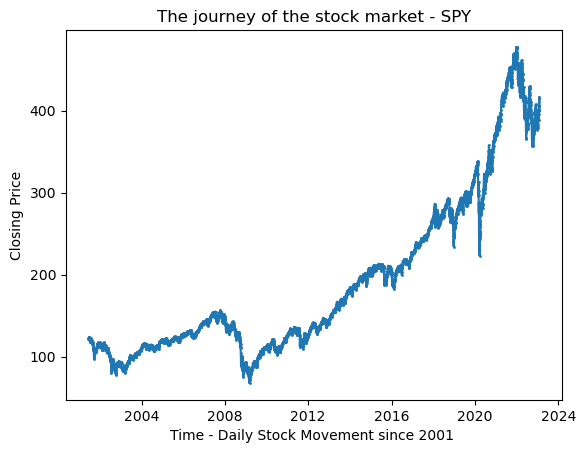

In [70]:
SPY_line = data.loc[data["Ticker"] == "SPY"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY")